In [1]:
import pandas as pd
import numpy as np

### read the purchase_behaviour dataset

purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [2]:
purchase_behaviour.shape

(72637, 3)

In [3]:
### check if there is null value in dataset

purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [4]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
### read transaction dataset

transaction_data = pd.read_csv('QVI_transaction_data.csv')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction_data.shape

(264836, 8)

In [7]:
### checking if there is null values

transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
## checking data type of each feature

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.2+ MB


In [9]:

transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
## convert the DATE column from intger to date_time data type

import datetime
transaction_data['DATE'] = transaction_data['DATE'].apply(lambda x: pd.Timestamp('1899-12-30') + pd.DateOffset(x))
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
## extract 'Red Rock Deli SR' brand chips

chips_salsa = transaction_data[transaction_data['PROD_NAME'].str.contains("Red Rock Deli SR")]
print(chips_salsa)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
32     2019-05-20         45           45127   41122        64   
189    2018-08-19        257          257168  256776        64   
222    2019-06-08          2            2203     806        64   
317    2019-03-30          5            5050    4671        64   
397    2018-10-17          9            9450    8955        64   
...           ...        ...             ...     ...       ...   
263924 2018-09-18         77           77099   75018        64   
263986 2019-05-02        236          236027  238695        64   
264516 2018-09-29        258          258321  257374        64   
264604 2019-01-07        262          262001  261328        64   
264780 2019-01-10        269          269222  266382        64   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
32      Red Rock Deli SR    Salsa & Mzzrlla 150g         2        5.4  
189     Red Rock Deli SR    Salsa & Mzzrlla 150g         2     

In [12]:
## extract all products of salsa 

salsa_prod = transaction_data[transaction_data['PROD_NAME'].str.contains("Salsa | Dip")] 
salsa_prod.shape


(18094, 8)

In [13]:
## remove 'Red Rock Deli SR'chips as it has salsa word but it is chips not salsa

salsa_prod = pd.concat([salsa_prod, chips_salsa]).drop_duplicates(keep=False)
print(salsa_prod)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
5      2019-05-19          4            4074    2982        57   
25     2019-05-15         39           39144   35506        57   
44     2018-08-18         56           56013   50090        39   
63     2019-05-15         82           82480   82047       101   
71     2018-08-15         94           94233   93956        65   
...           ...        ...             ...     ...       ...   
264663 2018-08-24        265          265018  263318       101   
264675 2019-04-20        265          265103  263419        59   
264678 2019-03-30        265          265111  263428        35   
264719 2018-10-28        266          266278  264104        39   
264734 2019-01-11        267          267324  264374        41   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
5       Old El Paso Salsa   Dip Tomato Mild 300g         1        5.1  
25      Old El Paso Salsa   Dip Tomato Mild 300g         1     

In [14]:
### Drop all salsa products from the transaction dataset

transaction_data = pd.concat([transaction_data, salsa_prod]).drop_duplicates(keep=False)
print(transaction_data)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [15]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,248198.000000,2.481980e+05,2.481980e+05,248198.000000,248198.000000,248198.000000
mean,135.057108,1.355351e+05,1.351369e+05,56.396808,1.907953,7.308295
std,76.783297,8.068914e+04,7.814268e+04,33.601516,0.658480,3.074382
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001800e+04,6.758525e+04,27.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351845e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030858e+05,2.026610e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


<function matplotlib.pyplot.show(*args, **kw)>

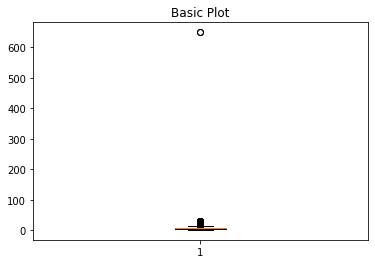

In [16]:
### checking the outliers for total sales features

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()

ax1.set_title('Basic Plot')

ax1.boxplot(transaction_data['TOT_SALES'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

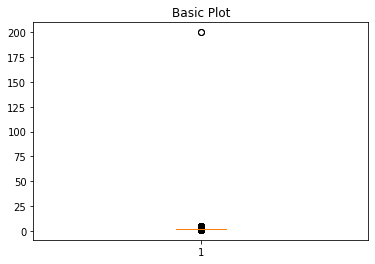

In [17]:
### checking the outliers for product qantity features


fig1, ax1 = plt.subplots()

ax1.set_title('Basic Plot')

ax1.boxplot(transaction_data['PROD_QTY'])
plt.show

In [18]:
### drop the two transaction which are outliers with tatal sales 200 

transaction_data[transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [19]:
transaction_data = transaction_data.drop(transaction_data[transaction_data['PROD_QTY'] == 200].index)

purchase_behaviour = purchase_behaviour.drop(purchase_behaviour[purchase_behaviour['LYLTY_CARD_NBR'] == 226000].index)



<function matplotlib.pyplot.show(*args, **kw)>

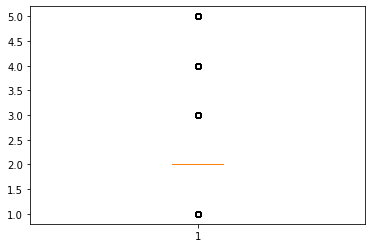

In [20]:
fig1, ax1 = plt.subplots()

#ax1.set_title('Basic Plot')

ax1.boxplot(transaction_data['PROD_QTY'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

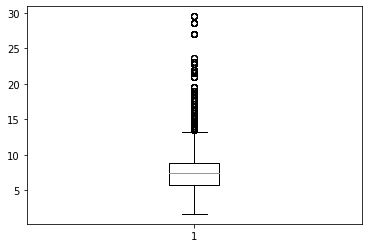

In [21]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()

#ax1.set_title('Basic Plot')

ax1.boxplot(transaction_data['TOT_SALES'])
plt.show

In [22]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,248196.000000,2.481960e+05,2.481960e+05,248196.000000,248196.000000,248196.000000
mean,135.056375,1.355343e+05,1.351362e+05,56.397230,1.906356,7.303116
std,76.783172,8.068906e+04,7.814257e+04,33.601323,0.342622,2.474554
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001800e+04,6.758475e+04,27.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030850e+05,2.026602e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [23]:
## when the latest date of transaction

transaction_data['DATE'].max()

Timestamp('2019-06-30 00:00:00')

In [24]:
## when the first date for transaction 

transaction_data['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [25]:
transaction_data['DATE'].unique().shape

(364,)

In [26]:
### find number of transaction each day  
tran_freq = pd.DataFrame(transaction_data.groupby(['DATE']).size(), columns= ['Frequency'])
print(tran_freq)

            Frequency
DATE                 
2018-07-01        669
2018-07-02        657
2018-07-03        682
2018-07-04        673
2018-07-05        663
...               ...
2019-06-26        662
2019-06-27        672
2019-06-28        680
2019-06-29        704
2019-06-30        704

[364 rows x 1 columns]


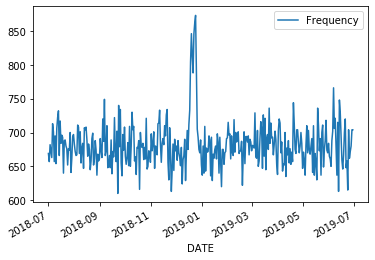

In [27]:
## Plot transactions over time day by day from 2018-07-01 to 2019-06-30

from pandas import read_csv
from matplotlib import pyplot
tran_freq.plot()
pyplot.show()

            Frequency
DATE                 
2018-12-01        680
2018-12-02        659
2018-12-03        688
2018-12-04        670
2018-12-05        663
2018-12-06        651
2018-12-07        678
2018-12-08        624
2018-12-09        660
2018-12-10        666
2018-12-11        690
2018-12-12        629
2018-12-13        669
2018-12-14        703
2018-12-15        675
2018-12-16        712
2018-12-17        733
2018-12-18        805
2018-12-19        846
2018-12-20        813
2018-12-21        788
2018-12-22        846
2018-12-23        862
2018-12-24        873
2018-12-26        705
2018-12-27        693
2018-12-28        675
2018-12-29        670
2018-12-30        689
2018-12-31        652


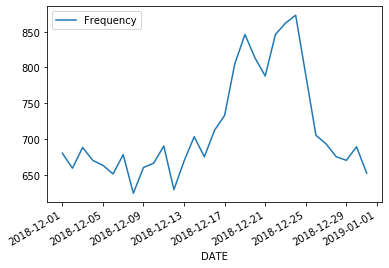

In [28]:
### find number of transaction each day for December 2018

Dec_2018 = tran_freq.reset_index()

mask = (Dec_2018['DATE']>='2018-12-01') & (Dec_2018['DATE'] <= '2018-12-31')

Dec_2018 = Dec_2018.loc[mask].set_index('DATE')
print(Dec_2018)

## Plot transactions over time day by day for December 2018 

Dec_2018.plot()
pyplot.show()

## Most shopping was during christmas time

Text(0, 0.5, 'Frequency')

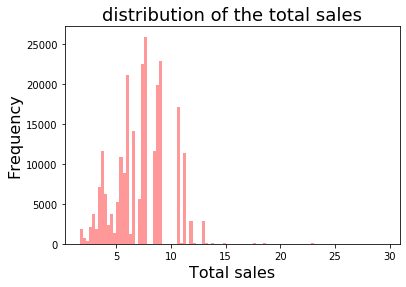

In [29]:
### distribution of the total sales 

import seaborn as sns

sns.distplot(transaction_data['TOT_SALES'], kde=False, color='red', bins=100)
plt.title('distribution of the total sales', fontsize=18)
plt.xlabel('Total sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

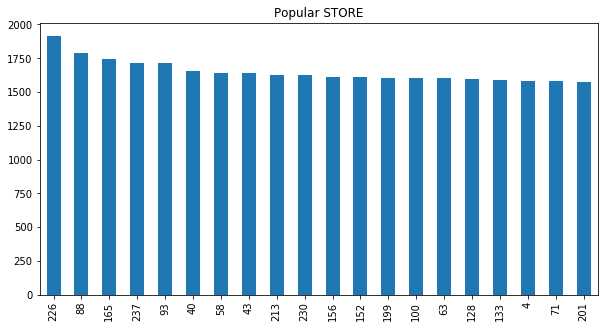

In [30]:
### find the most store where the chips were bought

import matplotlib.pyplot as plt

top = transaction_data['STORE_NBR'].value_counts().head(n=20)
top.plot(kind='bar')
plt.title('Popular STORE')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()




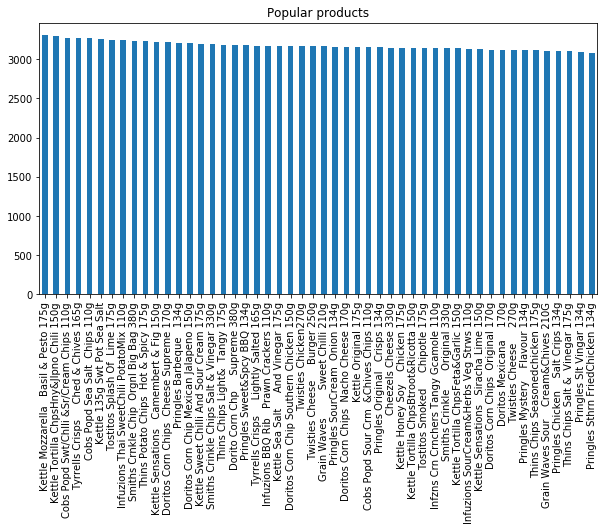

In [31]:
### the 50 most popular brand chips 

import matplotlib.pyplot as plt

top = transaction_data['PROD_NAME'].value_counts().head(n=50)
top.plot(kind='bar')
plt.title('Popular products')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()


In [32]:
### find the year and months columns from date column

transaction_data['Year'] = pd.DatetimeIndex(transaction_data['DATE']).year
transaction_data['Month'] = pd.DatetimeIndex(transaction_data['DATE']).month
transaction_data['Month_Year'] = pd.to_datetime(transaction_data['DATE']).dt.to_period('M')
 
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,Month_Year
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,2019-05
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,2019-05
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,2018-08
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,2018-08


Year        2018       2019
Month                      
1            NaN  152252.60
2            NaN  141103.70
3            NaN  156518.00
4            NaN  149925.00
5            NaN  146940.25
6            NaN  150832.50
7      155189.50        NaN
8      147918.85        NaN
9      150555.70        NaN
10     153998.30        NaN
11     150171.10        NaN
12     157198.70        NaN


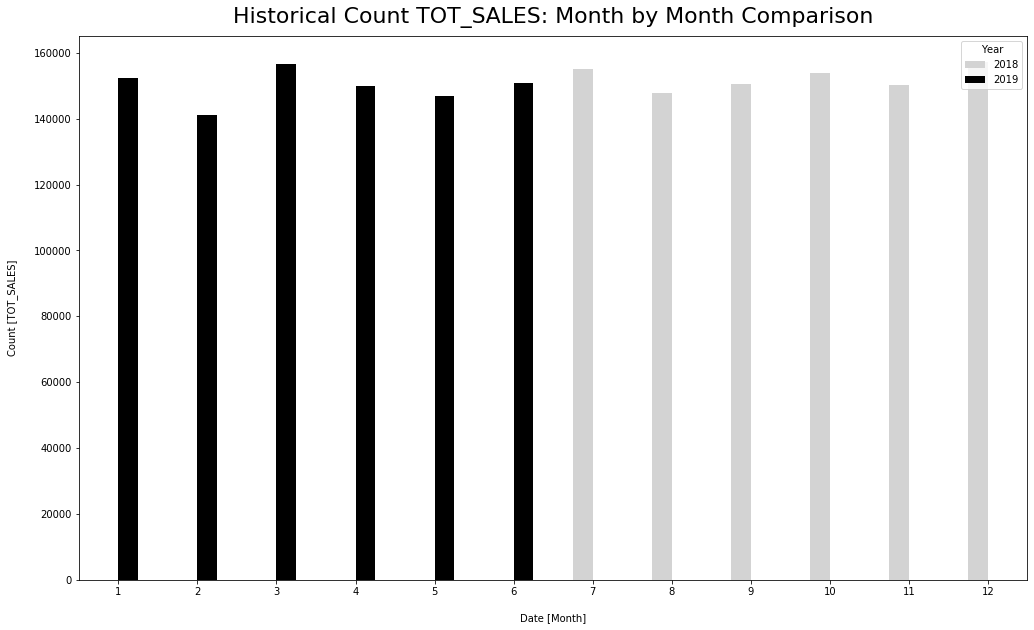

In [33]:
### find the total sales for each month in 2018 and 2019 

pv = pd.pivot_table(transaction_data, index='Month', columns= 'Year', values='TOT_SALES', aggfunc='sum')

print(pv)

pv.plot(kind='bar', figsize=(17, 10), color=['lightgray', 'black'], rot=0)                                       
plt.title("Historical Count TOT_SALES: Month by Month Comparison", y=1.013, fontsize=22)
plt.xlabel("Date [Month]", labelpad=16)
plt.ylabel("Count [TOT_SALES]", labelpad=16);

#### Generally there is more sale end of the year than the begining 

      Frequency
0              
175g      64927
150g      40163
134g      25102
110g      22387
170g      19983
165g      15297
330g      12540
380g       6416
270g       6285
200g       4473
135g       3257
250g       3169
210g       3167
90g        3008
190g       2995
160g       2970
220g       1564
70g        1507
180g       1468
125g       1454


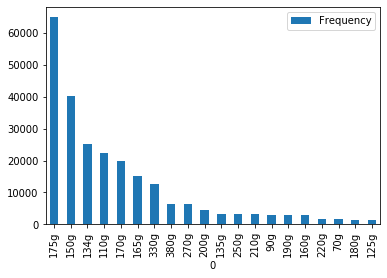

In [34]:
### Find the most favourite of pack size

res = transaction_data['PROD_NAME'].str.extract(r'(\d+g)', expand=True)
#print(res)

pack_size_frq = pd.DataFrame(res.groupby([0]).size(), columns= ['Frequency']).sort_values(by= ['Frequency'], ascending=False)

print(pack_size_frq)

pack_size_frq.plot(kind='bar')
plt.show()


            Frequency
0                    
Kettle          41288
Smiths          27388
Pringles        25102
Doritos         22041
Thins           14075
RRD             11894
Infuzions       11057
WW              10320
Cobs             9693
Tostitos         9471
Twisties         9454
Tyrrells         6442
Grain            6272
Natural          6050
Red              5885
Cheezels         4603
CCs              4551
Dorito           3183
Infzns           3144
Smith            2963
Cheetos          2927
Snbts            1576
Burger           1564
Woolworths       1516
GrnWves          1468
Sunbites         1432
NCC              1419
French           1418


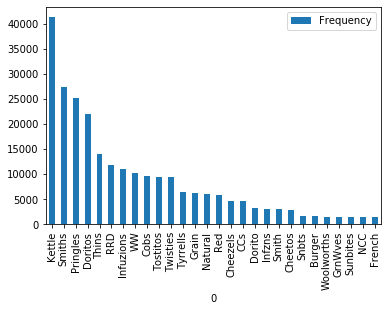

In [35]:
### find the most favourite brand chips for the customers

brand = transaction_data['PROD_NAME'].str.extract(r'(^\w+)', expand=True)
#print(brand)

brand_frq = pd.DataFrame(brand.groupby([0]).size(), columns= ['Frequency']).sort_values(by= ['Frequency'], ascending=False)

print(brand_frq)

brand_frq.plot(kind='bar')
plt.show()

In [36]:
### Explore the customer catogaries

purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [37]:
## Checking the data type 

purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72636 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72636 non-null  int64 
 1   LIFESTAGE         72636 non-null  object
 2   PREMIUM_CUSTOMER  72636 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


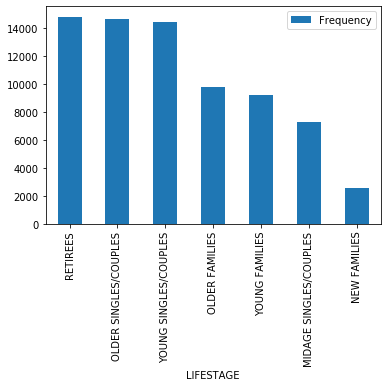

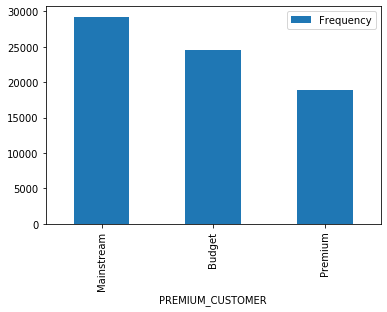

In [38]:
### find the most customer from which life stage and from which purchase behaviour

import matplotlib.pyplot as plt

LIFESTAGE_frq = pd.DataFrame(purchase_behaviour.groupby(['LIFESTAGE']).size(), columns= ['Frequency']).sort_values(by= ['Frequency'], ascending=False)
PREMIUM_CUSTOMER_frq = pd.DataFrame(purchase_behaviour.groupby(['PREMIUM_CUSTOMER']).size(), columns= ['Frequency']).sort_values(by= ['Frequency'], ascending=False)


LIFESTAGE_frq.plot(kind='bar')
PREMIUM_CUSTOMER_frq.plot(kind='bar')
plt.show()

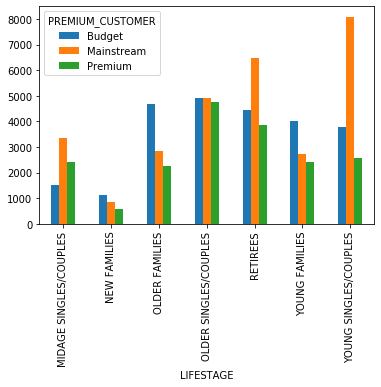

In [39]:

#### Most of the customers from the mainstream and young singles/couples 

frq = pd.DataFrame(purchase_behaviour.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).size(), columns= ['Frequency']).sort_values(by= ['PREMIUM_CUSTOMER'], ascending=False)
frq = frq.reset_index()
#print(frq)

freq_povit = frq.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Frequency')

freq_povit.plot(kind='bar')

In [40]:
### merge the transaction and purchase behaviour datasets 

merge_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR')

print(merge_data)
merge_data.isnull().sum()

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2018-11-10          1            1307     346        96   
3      2019-03-09          1            1307     347        54   
4      2019-05-20          1            1343     383        61   
...           ...        ...             ...     ...       ...   
248191 2019-03-09        272          272319  270088        89   
248192 2018-08-13        272          272358  270154        74   
248193 2018-11-06        272          272379  270187        51   
248194 2018-12-27        272          272379  270188        42   
248195 2018-09-22        272          272380  270189        74   

                                      PROD_NAME  PROD_QTY  TOT_SALES  Year  \
0        Natural Chip        Compny SeaSalt175g         2        6.0  2018   
1                      CCs Nacho Cheese    175g    

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Year                0
Month               0
Month_Year          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [41]:
### write the dataset to be saved in file 
merge_data.to_csv (r'merge_data.xlsx', index = False, header=True)


PREMIUM_CUSTOMER           Budget  Mainstream    Premium
LIFESTAGE                                               
MIDAGE SINGLES/COUPLES   33510.40    84963.75   54738.15
NEW FAMILIES             20661.45    16036.40   10817.50
OLDER FAMILIES          157646.75    96805.05   75647.60
OLDER SINGLES/COUPLES   128254.80   125188.50  124014.25
RETIREES                106291.60   145806.15   91650.35
YOUNG FAMILIES          130276.85    86770.25   78960.50
YOUNG SINGLES/COUPLES    57362.40   148030.40   39171.10


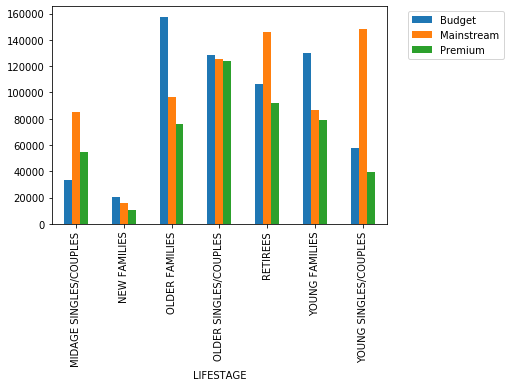

In [42]:
#- Who spends the most on chips (total sales), describing customers by lifestage and 
# how premium their general purchasing behaviour is


df1_total_sales=pd.pivot_table(merge_data, index=['PREMIUM_CUSTOMER','LIFESTAGE'],values=['TOT_SALES'],aggfunc=np.sum).sort_values(by= ['PREMIUM_CUSTOMER','LIFESTAGE'], ascending=False).reset_index()
#print(df1_total_sales)

total_sale_povit =df1_total_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')
print(total_sale_povit)

total_sale_povit.plot(kind='bar').legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')


PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1477        3300     2375
NEW FAMILIES              1089         832      576
OLDER FAMILIES            4617        2793     2234
OLDER SINGLES/COUPLES     4856        4866     4690
RETIREES                  4388        6369     3817
YOUNG FAMILIES            3957        2690     2401
YOUNG SINGLES/COUPLES     3660        7921     2487


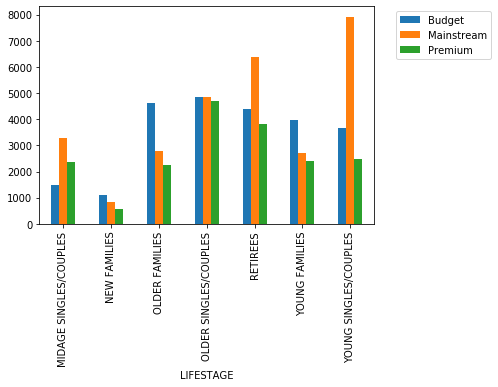

In [43]:
### - How many customers are in each segment

df1_customer =pd.pivot_table(merge_data, index=['PREMIUM_CUSTOMER','LIFESTAGE'],values=['LYLTY_CARD_NBR'], aggfunc=lambda x: len(x.unique())).sort_values(by= ['PREMIUM_CUSTOMER','LIFESTAGE'], ascending=False).reset_index()
#print(df1_customer)

total_customer_povit =df1_customer.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR')
print(total_customer_povit)

total_customer_povit.plot(kind='bar').legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')


   PREMIUM_CUSTOMER               LIFESTAGE  PROD_QTY  PROD_QTY/customer
0           Premium   YOUNG SINGLES/COUPLES     10619           4.269803
1           Premium          YOUNG FAMILIES     21045           8.765098
2           Premium                RETIREES     23397           6.129683
3           Premium   OLDER SINGLES/COUPLES     31872           6.795736
4           Premium          OLDER FAMILIES     20389           9.126679
5           Premium            NEW FAMILIES      2790           4.843750
6           Premium  MIDAGE SINGLES/COUPLES     14509           6.109053
7        Mainstream   YOUNG SINGLES/COUPLES     36391           4.594243
8        Mainstream          YOUNG FAMILIES     23354           8.681784
9        Mainstream                RETIREES     37913           5.952740
10       Mainstream   OLDER SINGLES/COUPLES     32807           6.742088
11       Mainstream          OLDER FAMILIES     25949           9.290727
12       Mainstream            NEW FAMILIES      40

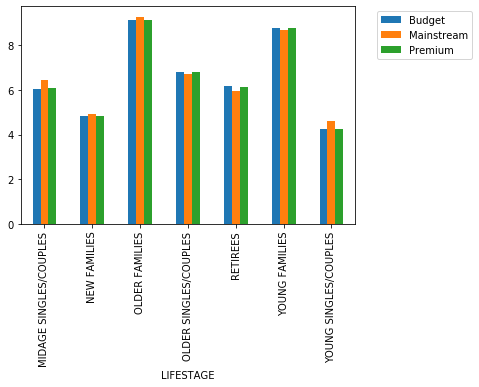

In [44]:
#- How many chips are bought per customer by segment

df1_units_per_customer = pd.pivot_table(merge_data, index=['PREMIUM_CUSTOMER','LIFESTAGE'],values=['PROD_QTY'], aggfunc= np.sum).sort_values(by= ['PREMIUM_CUSTOMER','LIFESTAGE'], ascending=False).reset_index()

df1_units_per_customer ['PROD_QTY/customer'] = df1_units_per_customer['PROD_QTY']/ df1_customer['LYLTY_CARD_NBR']
print(df1_units_per_customer)

total_units_povit =df1_units_per_customer.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='PROD_QTY/customer')
print(total_units_povit)

total_units_povit.plot(kind='bar').legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')


PREMIUM_CUSTOMER          Budget  Mainstream   Premium
LIFESTAGE                                             
MIDAGE SINGLES/COUPLES  3.746691    3.989283  3.772703
NEW FAMILIES            3.927286    3.929527  3.877240
OLDER FAMILIES          3.740758    3.730589  3.710216
OLDER SINGLES/COUPLES   3.881921    3.815908  3.891009
RETIREES                3.926401    3.845809  3.917184
YOUNG FAMILIES          3.755567    3.715434  3.751984
YOUNG SINGLES/COUPLES   3.679672    4.067775  3.688775


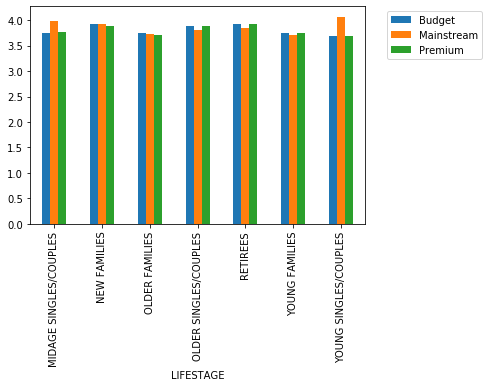

In [45]:
#- What's the average chip price by customer segment

df1_total_sales=pd.pivot_table(merge_data, index=['PREMIUM_CUSTOMER','LIFESTAGE'],values=['TOT_SALES'],aggfunc=np.sum).sort_values(by= ['PREMIUM_CUSTOMER','LIFESTAGE'], ascending=False).reset_index()
#print(df1_total_sales)

df1_total_sales ['TOT_SALES/units'] = df1_total_sales['TOT_SALES']/ df1_units_per_customer['PROD_QTY']
#print(df1_total_sales)

total_sale_perunit_povit =df1_total_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES/units')
print(total_sale_perunit_povit)

total_sale_perunit_povit.plot(kind='bar').legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')


In [53]:
### Explore the Mainstream - young singles/couples customers in deep 

merge_data_young_singlescouples = merge_data[merge_data.LIFESTAGE.str.contains('YOUNG SINGLES/COUPLES',case=False) & merge_data.PREMIUM_CUSTOMER.str.contains('Mainstream',case=False)]
print(merge_data_young_singlescouples)

other_brand = pd.concat([merge_data, merge_data_young_singlescouples]).drop_duplicates(keep=False)
print(other_brand)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
222681 2018-08-16          1            1020      26        19   
222682 2018-10-02          1            1020      27         7   
222683 2019-05-02          1            1020      28        84   
222684 2018-08-17          1            1163     188        46   
222685 2019-02-07          1            1163     189        12   
...           ...        ...             ...     ...       ...   
242314 2018-12-01        272          272377  270186        75   
242315 2018-07-27        272          272389  270200       114   
242316 2018-11-10        272          272389  270201        26   
242317 2019-04-01        272          272389  270202        62   
242318 2018-12-07        272          272391  270205        63   

                                      PROD_NAME  PROD_QTY  TOT_SALES  Year  \
222681      Smiths Crinkle Cut  Snag&Sauce 150g         1        2.6  2018   
222682        Smiths Crinkle      Original 330g    

In [63]:
### create dataset for each brand and the quantity which were bought by Mainstream - young singles/couples customers
### and dataset for each brand and the quantity which were bought by other customers

brand_young_mainstream = merge_data_young_singlescouples['PROD_NAME'].str.extract(r'(^\w+)', expand=True)
brand_young_mainstream.rename(columns = {0:'Brands'}, inplace = True) 

brand_young_mainstream['Transaction'] = merge_data_young_singlescouples['TXN_ID']
brand_young_mainstream['PROD_QTY'] = merge_data_young_singlescouples['PROD_QTY']


print(brand_young_mainstream)

brand_others = other_brand['PROD_NAME'].str.extract(r'(^\w+)', expand=True)
brand_others.rename(columns = {0:'Brands'}, inplace = True) 

brand_others['Transaction'] = other_brand['TXN_ID']
brand_others['PROD_QTY'] = other_brand['PROD_QTY']


print(brand_others)



          Brands  Transaction  PROD_QTY
222681    Smiths           26         1
222682    Smiths           27         1
222683   GrnWves           28         1
222684    Kettle          188         1
222685   Natural          189         1
...          ...          ...       ...
242314      Cobs       270186         2
242315    Kettle       270200         2
242316  Pringles       270201         2
242317  Pringles       270202         2
242318    Kettle       270205         2

[19638 rows x 3 columns]
          Brands  Transaction  PROD_QTY
0        Natural            1         2
1            CCs          348         3
2             WW          346         2
3            CCs          347         1
4         Smiths          383         2
...          ...          ...       ...
248191    Kettle       270088         2
248192  Tostitos       270154         1
248193   Doritos       270187         2
248194   Doritos       270188         2
248195  Tostitos       270189         2

[228558 rows 

            PROD_QTY  Qty_others   percent
Brands                                    
Dorito      0.015636    0.012684  1.232680
Tyrrells    0.031409    0.025540  1.229772
Twisties    0.045973    0.037652  1.220984
Doritos     0.106565    0.087792  1.213831
Kettle      0.197082    0.164574  1.197529
Tostitos    0.045203    0.037753  1.197345
Infzns      0.014866    0.012499  1.189411
Pringles    0.118876    0.100039  1.188290
Grain       0.028991    0.024973  1.160901
Cobs        0.044434    0.038818  1.144684
Infuzions   0.049518    0.044228  1.119600
Thins       0.060097    0.056649  1.060869
Cheezels    0.017889    0.018537  0.965069
Smiths      0.089363    0.111542  0.801157
French      0.003930    0.005724  0.686505
Red         0.016295    0.024162  0.674414
Cheetos     0.007996    0.011995  0.666642
RRD         0.031876    0.048860  0.652396
Natural     0.015883    0.024833  0.639597
NCC         0.003627    0.005838  0.621272
CCs         0.011129    0.018784  0.592485
GrnWves    

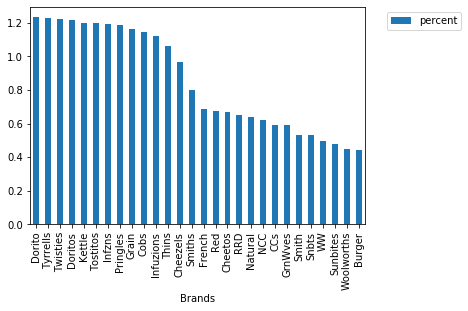

In [78]:
### find the percentage of favourite brands for Mainstream - young singles/couples customers compared with other customers

sum_qty_brand_young = brand_young_mainstream['PROD_QTY'].sum()
sum_qty_brand_not_young = brand_others['PROD_QTY'].sum()


brand_young= brand_young_mainstream.groupby(['Brands'])['PROD_QTY'].sum().reset_index().fillna(0).set_index('Brands').sort_values(by= ['PROD_QTY'], ascending=False)
brand_young =  brand_young/sum_qty_brand_young


brand_not_young =  brand_others.groupby(['Brands'])['PROD_QTY'].sum().reset_index().fillna(0).set_index('Brands').sort_values(by= ['PROD_QTY'], ascending=False)

brand_young['Qty_others'] = brand_not_young/sum_qty_brand_not_young

brand_young['percent'] = (brand_young['PROD_QTY'] / brand_young['Qty_others'])

print(brand_young.sort_values(by= ['percent'], ascending=False))

brand_young['percent'].sort_values( ascending=False).plot(kind='bar').legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')


In [75]:


pack_size_young_mainstream = merge_data_young_singlescouples['PROD_NAME'].str.extract(r'(\d+g)', expand=True)
pack_size_young_mainstream.rename(columns = {0:'pack_size'}, inplace = True) 

pack_size_young_mainstream['Transaction'] = merge_data_young_singlescouples['TXN_ID']
pack_size_young_mainstream['PROD_QTY'] = merge_data_young_singlescouples['PROD_QTY']


print(pack_size_young_mainstream)

pack_size_others = other_brand['PROD_NAME'].str.extract(r'(\d+g)', expand=True)
pack_size_others.rename(columns = {0:'pack_size'}, inplace = True) 

pack_size_others['Transaction'] = other_brand['TXN_ID']
pack_size_others['PROD_QTY'] = other_brand['PROD_QTY']


print(pack_size_others)


       pack_size  Transaction  PROD_QTY
222681      150g           26         1
222682      330g           27         1
222683      180g           28         1
222684      175g          188         1
222685      175g          189         1
...          ...          ...       ...
242314      110g       270186         2
242315      150g       270200         2
242316      134g       270201         2
242317      134g       270202         2
242318      135g       270205         2

[19638 rows x 3 columns]
       pack_size  Transaction  PROD_QTY
0           175g            1         2
1           175g          348         3
2           160g          346         2
3           175g          347         1
4           170g          383         2
...          ...          ...       ...
248191      175g       270088         2
248192      175g       270154         1
248193      170g       270187         2
248194      150g       270188         2
248195      175g       270189         2

[228558 rows 

           PROD_QTY  Qty_others   percent
pack_size                                
270g       0.031684    0.024947  1.270019
380g       0.032013    0.025433  1.258745
210g       0.015388    0.012526  1.228483
330g       0.061004    0.049865  1.223384
134g       0.118876    0.100039  1.188290
110g       0.105795    0.089260  1.185253
135g       0.014701    0.012998  1.131052
250g       0.014289    0.012705  1.124699
170g       0.080404    0.080507  0.998731
150g       0.157429    0.162204  0.970563
175g       0.250419    0.262330  0.954595
165g       0.055398    0.061899  0.894977
190g       0.007447    0.012368  0.602092
180g       0.003572    0.006031  0.592346
160g       0.006375    0.012300  0.518322
90g        0.006320    0.012506  0.505387
125g       0.002995    0.006001  0.499123
200g       0.008931    0.018546  0.481555
70g        0.003023    0.006285  0.480948
220g       0.002913    0.006557  0.444202


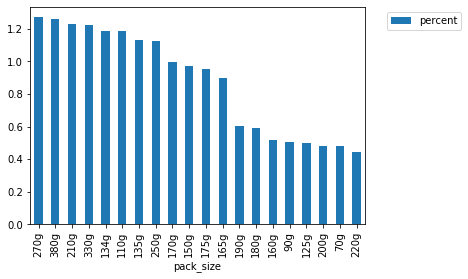

In [76]:
### find the percentage of favourite pack size for Mainstream - young singles/couples customers compared with other customers

sum_qty_packsize_young = pack_size_young_mainstream['PROD_QTY'].sum()
sum_qty_packsize_not_young = pack_size_others['PROD_QTY'].sum()


packsize_young= pack_size_young_mainstream.groupby(['pack_size'])['PROD_QTY'].sum().reset_index().fillna(0).set_index('pack_size').sort_values(by= ['PROD_QTY'], ascending=False)
packsize_young =  packsize_young/sum_qty_packsize_young


packsize_not_young =  pack_size_others.groupby(['pack_size'])['PROD_QTY'].sum().reset_index().fillna(0).set_index('pack_size').sort_values(by= ['PROD_QTY'], ascending=False)

packsize_young['Qty_others'] = packsize_not_young/sum_qty_packsize_not_young

packsize_young['percent'] = (packsize_young['PROD_QTY'] / packsize_young['Qty_others'])

print(packsize_young.sort_values(by= ['percent'], ascending=False))

packsize_young['percent'].sort_values( ascending=False).plot(kind='bar').legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
